# IBM cloud deployment

Team ID - PNT2022TMID27693

# Importing the required libraries

In [11]:
!pip install tensorflow --upgrade

     -------------------------------------- 266.3/266.3 MB 4.7 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 13.4 MB/s eta 0:00:00
     -------------------------------------- 439.2/439.2 kB 5.5 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 10.6 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.10.0
    Uninstalling tensorflow-estimator-2.10.0:
      Successfully uninstalled tensorflow-estimator-2.10.0
  Attempting uninstall: keras
    Found existing installation: keras 2.10.0
    Uninstalling keras-2.10.0:
      Successfully uninstalled keras-2.10.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.10.1
    Uninstalling tensorboard-2.10.1:
      Successfully uninstalled tensorboard-2.10.1


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\hp\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\tensorflow\\compiler\\tf2tensorrt\\_pywrap_py_utils.pyd'
Check the permissions.



In [2]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #convolutional Layer
from keras.utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

# Load data

In [3]:
(x_train, y_train), (x_test, y_test)=mnist.load_data () #splitting the mnist data into train and test

In [4]:
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

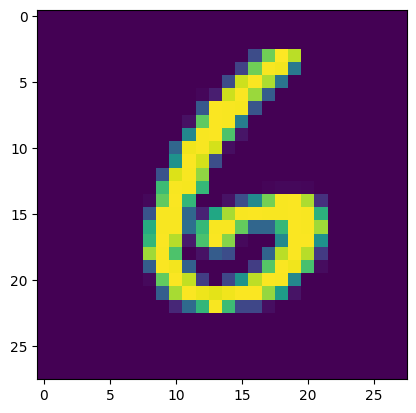

In [6]:
plt.imshow(x_train[6000])     #ploting the index=image

In [7]:
np.argmax(y_train[6000])

0

# Reshaping Dataset

In [8]:
#Reshaping to format which CNN expects (batch, height, width, channels)
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

# Applying One Hot Encoding

In [9]:
number_of_classes = 10  #storing the no of classes in a variable

In [10]:
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

# Add CNN Layers

In [11]:
#create model
model=Sequential ()

In [12]:
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [13]:
#flatten the dimension of the image
model.add(Flatten())

In [14]:
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

# Compiling the model

In [15]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [16]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

# Train the model

In [17]:
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 122s 65ms/step - loss: 0.2342 - accuracy: 0.9536 - val_loss: 0.0756 - val_accuracy: 0.9767
Epoch 2/5
1875/1875 [==============================] - 114s 61ms/step - loss: 0.0667 - accuracy: 0.9795 - val_loss: 0.0743 - val_accuracy: 0.9762
Epoch 3/5
1875/1875 [==============================] - 132s 71ms/step - loss: 0.0488 - accuracy: 0.9846 - val_loss: 0.0811 - val_accuracy: 0.9779
Epoch 4/5
1875/1875 [==============================] - 145s 77ms/step - loss: 0.0386 - accuracy: 0.9882 - val_loss: 0.0787 - val_accuracy: 0.9773
Epoch 5/5
1875/1875 [==============================] - 151s 80ms/step - loss: 0.0299 - accuracy: 0.9905 - val_loss: 0.0908 - val_accuracy: 0.9784


# Observing the metrics

In [18]:
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.09081123024225235, 0.9783999919891357]


# Test The Model

In [19]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

1/1 [==============================] - 0s 117ms/step
[[1.7662790e-16 5.7316601e-19 3.7577753e-15 8.3117193e-06 1.7037990e-05
  1.9123043e-08 3.6117895e-16 7.6513551e-08 5.2619345e-08 9.9997461e-01]]


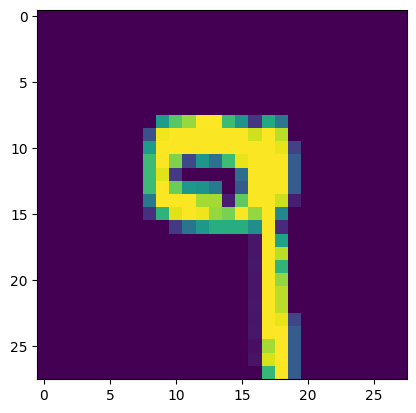

In [20]:
plt.imshow(x_test[6000])

In [21]:
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images

[9]


In [22]:
np.argmax(y_test[6000:6001]) #printing the actual labels

9

# Save The model

In [23]:
# Save the model
model.save('models/mnistCNN.h5')

In [24]:
cd models

C:\Users\hp\Downloads\IBM-Project-20414-1659718946\Project-Development-Phase\Sprint 4\models


In [26]:
pwd

'C:\\Users\\hp\\Downloads\\IBM-Project-20414-1659718946\\Project-Development-Phase\\Sprint 4\\models'

In [ ]:
!tar -zcvf handwritten-digit-recognition-model_new.tgz mnistCNN.h5

In [2]:
!pip install watson-machine-learning-client --upgrade

# Cloud deploy

In [8]:
from ibm_watson_machine_learning import APIClient
credentials ={
    "url":"https://jp-tok.ml.cloud.ibm.com",
    "apikey":"KGntsq0dqQGaRo45fB0qk4gb6tCtfW5ky--K7G5VDIUb"
}
client = APIClient(credentials)
client

In [9]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:jp-tok:a/65cf18e0b03840198997ad0361a78ae7:d85c1035-58b3-482b-9de0-62ddb8b5a0d7::',
      'guid': 'd85c1035-58b3-482b-9de0-62ddb8b5a0d7',
      'name': 'Watson Machine Learning-cc',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'sprint4dep',
    'scope': {'bss_account_id': '65cf18e0b03840198997ad0361a78ae7'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': '983190de-3cd6-4409-ae0c-c3431cd31673',
      'bucket_region': 'jp-tok-standard',
      'credentials': {'admin': {'access_key_id': '934f58f42eec4a57ba6c1a93a739f94a',
        'api_key': 'dRjMqQ5nsaIRVHIs8mAPDwB71mhC_YGLJIGrbVG3qAhw',
        'secret_access_key': '279ecd89228605b355f73d77843db068121bf915144bc5e1',
        'service_id': 'ServiceId-0168909c-53d7-4958-b5bb-2a4d1740f4fa'},
       'editor': {'access_key_id': 'a72b923817754539ad8fe79a234eaddb',
        'api_

In [10]:
def guid_from_space_name(client,deploy):
  space = client.spaces.get_details()
  return (next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [ ]:
space_uid = guid_from_space_name(client,'digitrecognition')
print("Space UID = " + space_uid)

In [58]:
client.set.default_space(space_uid)

'SUCCESS'

In [59]:
client.software_specifications.list(limit=100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [60]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [61]:
model_details = client.repository.store_model(model='handwritten-digit-recognition-model_new.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN Digit recognition model",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [62]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-15T04:58:42.566Z',
  'id': 'bf3f45b6-c032-45ce-9cbc-64541fe7bced',
  'modified_at': '2022-11-15T04:58:46.965Z',
  'name': 'CNN Digit recognition model',
  'owner': 'IBMid-667000CZ2Y',
  'resource_key': '2dbb7f5f-6fc9-499a-aac2-085d3c071f95',
  'space_id': 'aa24227a-9f01-493f-90e6-1b6132057fc6'},
 'system': {'warnings': []}}

In [63]:
model_id = client.repository.get_model_id(model_details)
model_id

'bf3f45b6-c032-45ce-9cbc-64541fe7bced'

In [ ]:
client.repository.download(model_id,'DigitRecog_IBM_model.tar.gz')

In [65]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 7C60-CE44

 Directory of C:\Users\hp\Downloads\IBM-Project-20414-1659718946\Project-Development-Phase\Sprint 4\models

15-Nov-22  06:47 AM    <DIR>          .
15-Nov-22  06:47 AM    <DIR>          ..
15-Nov-22  06:47 AM         2,319,342 DigitRecog_IBM_model.tar.gz
15-Nov-22  06:45 AM         2,319,342 handwritten-digit-recognition-model_new.tgz
15-Nov-22  06:43 AM         2,475,168 mnistCNN.h5
               3 File(s)      7,113,852 bytes
               2 Dir(s)  44,180,271,104 bytes free


# TEST MODEL

In [66]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [67]:
model = load_model("mnistCNN.h5")

In [79]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='KGntsq0dqQGaRo45fB0qk4gb6tCtfW5ky--K7G5VDIUb',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.us-east.cloud-object-storage.appdomain.cloud')

bucket = 'handwrittenforsprint4'
object_key = '55.png'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [80]:
img = Image.open(streaming_body_1).convert("L") # convert image to monochrome
img = img.resize( (28,28) ) # resizing of input image

In [81]:
img

In [82]:
im2arr = np.array(img) #converting to image
im2arr = im2arr.reshape(1, 28, 28, 1) #reshaping according to our requirement

In [83]:
pred = model.predict(im2arr)
print(pred)

1/1 [==============================] - 0s 104ms/step
[[1.3385103e-14 7.3480496e-13 4.8976140e-08 6.2034937e-04 1.0703821e-11
  9.8845661e-01 1.8612450e-08 1.0921785e-02 5.2048023e-07 7.1090477e-07]]


In [84]:
print(np.argmax(pred, axis=1)) #printing our Labels

[5]
